# Recommenders Assignment Solutions

## 1. Content-Based Filtering: Cosine Similarity

In [1]:
# 1. Read in the data from the first tab of the Movie Ratings spreadsheet, which contains genre labels
import pandas as pd

# read in the movies tab of the spreadsheet
movies = pd.read_excel('../Data/Movie_Ratings.xlsx')
movies.head()

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [2]:
# 2. Remove the non-genre columns of the movie genre data
genres = movies.drop(columns='Movie_ID').set_index('Movie_Title')
genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie_Title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [3]:
# 3. Calculate the cosine similarity of Toy Story (1995) and Get Shorty (1995)
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(genres.loc[['Toy Story (1995)', 'Get Shorty (1995)']]) # they are somewhat similar because they're both comedies

array([[1.        , 0.33333333],
       [0.33333333, 1.        ]])

In [4]:
# 4. Calculate the cosine similarity of Toy Story (1995) compared with all the movies

# calculate all the cosine similarities
cosine_matrix = cosine_similarity(genres)
cosine_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.        , 1.        , 0.57735027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57735027, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.70710678],
       [0.57735027, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        1.        ]])

In [5]:
# display the results
cosine_df = pd.DataFrame(cosine_matrix, index=movies['Movie_Title'], columns=movies['Movie_Title']).reset_index()
cosine_df.head()

Movie_Title,Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,Toy Story (1995),1.000000,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.666667,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.57735,0.00000
1,GoldenEye (1995),0.000000,1.000000,0.57735,0.333333,0.333333,0.00000,0.000000,0.000000,0.00000,...,0.816497,0.00000,0.00000,0.00000,0.00000,0.00000,0.408248,0.000000,0.00000,0.00000
2,Four Rooms (1995),0.000000,0.577350,1.00000,0.000000,0.577350,0.00000,0.000000,0.000000,0.00000,...,0.707107,0.00000,0.00000,0.00000,0.00000,0.00000,0.707107,0.000000,0.00000,0.00000
3,Get Shorty (1995),0.333333,0.333333,0.00000,1.000000,0.333333,0.57735,0.408248,0.666667,0.57735,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.000000,0.408248,0.57735,0.57735
4,Copycat (1995),0.000000,0.333333,0.57735,0.333333,1.000000,0.57735,0.408248,0.333333,0.57735,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.408248,0.408248,0.00000,0.57735


In [6]:
# look at just Toy Story (1995)
cosine_df[['Movie_Title', 'Toy Story (1995)']]

Movie_Title,Movie_Title,Toy Story (1995)
0,Toy Story (1995),1.000000
1,GoldenEye (1995),0.000000
2,Four Rooms (1995),0.000000
3,Get Shorty (1995),0.333333
4,Copycat (1995),0.000000
...,...,...
1677,Mat' i syn (1997),0.000000
1678,B. Monkey (1998),0.000000
1679,Sliding Doors (1998),0.000000
1680,You So Crazy (1994),0.577350


In [7]:
# 5. Return the top 5 movies with the highest cosine similarity - these make sense because they are kids movies
cosine_df[['Movie_Title', 'Toy Story (1995)']].sort_values(by='Toy Story (1995)', ascending=False).head(6)

Movie_Title,Movie_Title,Toy Story (1995)
0,Toy Story (1995),1.000000
421,Aladdin and the King of Thieves (1996),1.000000
94,Aladdin (1992),0.866025
1218,"Goofy Movie, A (1995)",0.866025
242,Jungle2Jungle (1997),0.816497
622,Angels in the Outfield (1994),0.816497


## 2. User-Item Matrix

In [8]:
# 1. Read in the movies, users and ratings tabs of the spreadsheet into three DataFrames

In [9]:
# read in the three tables of the spreadsheet
movies = pd.read_excel('../Data/Movie_Ratings.xlsx')
movies.head()

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [10]:
# read in the users tab
users = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=1)
users.head()

,User_ID,Age,Gender,Occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [11]:
# read in the ratings tab
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=2)
ratings.head()

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [12]:
# view the range of ratings
ratings.describe()

,User_ID,Movie_ID,Rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [13]:
# 2. Use .pivot to restructure the ratings data into a user-item matrix
X = (ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3))
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


## 3. TruncatedSVD

In [14]:
# 1. Apply TruncatedSVD to the user-item matrix from the last assignment

In [15]:
# import truncated svd from sklearn
from sklearn.decomposition import TruncatedSVD

In [16]:
# apply SVD to the ratings
svd = TruncatedSVD(n_components=2)
svd.fit(X)

TruncatedSVD()

In [17]:
# 2. View the user-item matrix and the shape of the user-item matrix
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [18]:
X.shape

(943, 1682)

In [19]:
# 3. View the U matrix and the shape of the U matrix
U = svd.transform(X)
U_df = pd.DataFrame(U)
U_df.head()

,0,1
0,127.325618,7.173045
1,124.145754,-2.173884
2,122.727835,-2.533038
3,123.802128,-2.822308
4,122.566026,0.754501


In [20]:
U_df.shape

(943, 2)

In [21]:
# 4. View the VT matrix and the shape of the VT matrix
VT = svd.components_
VT_df = pd.DataFrame(VT)
VT_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.027515,0.024345,0.024133,0.025100,0.024327,0.024231,0.026796,0.025988,0.026408,0.024741,...,0.024100,0.024109,0.024100,0.024091,0.024100,0.024083,0.024100,0.024091,0.024100,0.024100
1,0.068070,0.008369,-0.007014,0.051881,-0.004403,-0.009123,0.061829,0.073483,0.052806,0.007769,...,-0.010383,-0.009653,-0.010383,-0.010600,-0.010383,-0.009784,-0.010383,-0.010083,-0.010383,-0.010383


In [22]:
VT.shape

(2, 1682)

## 4. Choosing the Number of Components

In [23]:
# 1. Fit a TruncatedSVD model with 500 components
svd500 = TruncatedSVD(n_components=500)
U500 = svd500.fit_transform(X)

In [24]:
# view the U matrix
U500_df = pd.DataFrame(U500)
U500_df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,127.325618,7.173031,0.907461,5.231709,-2.167019,-1.874486,-4.432229,2.894944,2.266183,0.029382,...,-0.177418,-0.079359,-0.055039,0.243576,0.032462,-0.002061,0.115724,0.004078,-0.098548,-0.030788
1,124.145754,-2.173872,0.531446,0.834728,2.276656,-0.611334,-0.515801,2.473437,1.182575,-0.290647,...,0.273377,-0.024950,0.002978,-0.290467,-0.024212,-0.328797,0.042504,-0.024866,-0.202074,0.298728
2,122.727835,-2.533028,0.567466,-0.600540,-0.735368,0.202150,-0.220568,-1.349227,0.322606,-0.567155,...,-0.239470,-0.361461,0.321223,-0.120854,-0.091036,0.222026,-0.243310,0.205371,-0.075252,0.321077
3,123.802128,-2.822308,-0.533045,0.232890,-0.125395,0.595281,-0.011407,0.062385,-0.514061,0.398184,...,-0.558579,-0.181209,0.209067,-0.110917,-0.271769,0.012335,0.019326,-0.260141,-0.081099,0.263295
4,122.566026,0.754483,0.591899,1.772757,-4.253326,1.408859,-3.002253,2.684717,0.209389,1.068306,...,-0.072126,0.002318,0.038413,0.124625,0.072838,0.058034,0.058171,-0.126260,-0.051641,0.061289


In [25]:
# view the shape of the U matrix (users x latent features)
U500_df.shape

(943, 500)

In [26]:
# 2. Plot the cumulative explained variance ratios
import numpy as np

cum_evr500 = list(zip(range(1, U500.shape[1] + 1), np.cumsum(svd500.explained_variance_ratio_))) # hits 80% at 208 components
cum_evr500

[(1, 0.026342243723369862),
 (2, 0.09670746059197166),
 (3, 0.13352313267970747),
 (4, 0.1541613583429873),
 (5, 0.17065872214204264),
 (6, 0.18475289185595234),
 (7, 0.1977792363226048),
 (8, 0.20900163758765117),
 (9, 0.2195112894931736),
 (10, 0.228834648054997),
 (11, 0.23775293399909755),
 (12, 0.24629115603506946),
 (13, 0.25438713039454686),
 (14, 0.2620810121696756),
 (15, 0.2693878605688261),
 (16, 0.2763499247194588),
 (17, 0.28309471362848737),
 (18, 0.2895425728016851),
 (19, 0.295864942333013),
 (20, 0.3019866643757121),
 (21, 0.30802005306536245),
 (22, 0.3139973586073401),
 (23, 0.3197739860970716),
 (24, 0.3254239327157052),
 (25, 0.33095913504794905),
 (26, 0.33638743816101757),
 (27, 0.3416598544719038),
 (28, 0.3468778426769639),
 (29, 0.352056349311316),
 (30, 0.3571068834606961),
 (31, 0.3620849315227948),
 (32, 0.36695349298760527),
 (33, 0.3717945229868248),
 (34, 0.3765442619193425),
 (35, 0.38125827489405467),
 (36, 0.3859120327186517),
 (37, 0.3904472710339984

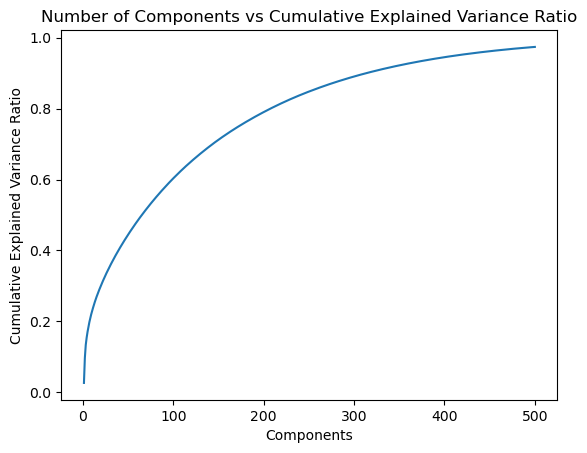

In [27]:
# view the plot
cum_evr500_df = pd.DataFrame(cum_evr500).set_index(0)
cum_evr500_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                xlabel='Components',
                ylabel='Cumulative Explained Variance Ratio',
                legend=False);

In [28]:
# 3. Suggest a “good” number of components that best captures the info in the data set: 250 explains 80%+ of variance

In [29]:
# 4. Fit another TruncatedSVD model with the “good” number of components

In [30]:
# apply SVD to the ratings
svd250 = TruncatedSVD(n_components=250)
U250 = svd250.fit_transform(X)

In [31]:
# view the U matrix
U250_df = pd.DataFrame(U250)
U250_df.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,127.325618,7.173031,0.907461,5.231709,-2.167019,-1.874486,-4.432229,2.894945,2.266183,0.029382,...,-0.154274,0.346865,0.053552,0.438419,0.127061,-0.329494,0.188152,0.317267,0.197293,-0.473627
1,124.145754,-2.173872,0.531446,0.834728,2.276656,-0.611334,-0.515801,2.473436,1.182574,-0.290646,...,-0.384022,0.079685,0.134671,-0.067359,-0.595052,-0.252366,-0.220010,0.450068,-0.202740,-0.229277
2,122.727835,-2.533028,0.567466,-0.600540,-0.735368,0.202150,-0.220568,-1.349226,0.322607,-0.567155,...,0.511214,0.158191,0.238493,-0.401088,-0.065520,-0.133686,-0.126863,0.185976,0.609333,-0.078582
3,123.802128,-2.822308,-0.533045,0.232890,-0.125395,0.595281,-0.011407,0.062385,-0.514060,0.398185,...,0.325376,0.021504,0.021239,0.066249,-0.100423,-0.382216,-0.577781,0.244005,-0.325664,-0.316722
4,122.566026,0.754483,0.591899,1.772757,-4.253326,1.408859,-3.002252,2.684717,0.209389,1.068307,...,0.273743,-0.512999,0.203233,0.399294,-0.269875,0.382966,0.347306,0.142759,-0.538641,-0.480312


In [32]:
# view the shape of the U matrix (users x latent features)
U250.shape

(943, 250)

In [33]:
# cumulative explained variance ratio
sum(svd250.explained_variance_ratio_)

0.8467593588036926

## 5. Making Collaborative Filtering Recommendations

In [34]:
# 1. View the new user vector
import pandas as pd
import numpy as np

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 5 ratings
ratings = [5, 3, 5, 5, 4]
positions_to_populate = [11, 14, 28, 63, 66]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=movies.Movie_Title)
new_user_df

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# view only the movies that the new user rated
new_user_df.T.dropna()

,0
Movie_Title,
"Usual Suspects, The (1995)",5.0
Mr. Holland's Opus (1995),3.0
Batman Forever (1995),5.0
"Shawshank Redemption, The (1994)",5.0
Ace Ventura: Pet Detective (1994),4.0


In [36]:
# 2. Transform the user into the latent space using .transform()
new_user_250 = svd250.transform(new_user_df.fillna(3))
new_user_250[0][:5]

/Users/alice/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


array([ 1.23173718e+02, -2.50283200e+00,  1.16245959e-01, -1.52219134e-01,
       -2.28008924e-01])

In [37]:
# 3. Reconstruct the user-item matrix for the user using np.dot()
new_user_pred = np.dot(new_user_250, svd250.components_)
new_user_pred

array([[3.02561776, 3.10561169, 3.08302247, ..., 3.00412354, 3.00426268,
        3.00426268]])

In [38]:
# 4. Make 10 movie recommendations for the user
new_user_recs = pd.DataFrame(new_user_pred, columns=movies.Movie_Title)
new_user_recs

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,3.025618,3.105612,3.083022,2.932044,3.043666,3.028277,3.070035,3.002716,3.037891,3.152414,...,3.004263,3.001497,3.004263,2.998424,3.004263,3.003984,3.004263,3.004124,3.004263,3.004263


In [39]:
# sort the recommendations
top_recs = new_user_recs.T.sort_values(by=0, ascending=False).head(14)
top_recs.columns = ['Recs']
top_recs

,Recs
Movie_Title,
"Shawshank Redemption, The (1994)",4.522556
"Usual Suspects, The (1995)",4.442068
Batman Forever (1995),3.508099
Ace Ventura: Pet Detective (1994),3.348067
Tommy Boy (1995),3.195354
Reservoir Dogs (1992),3.190406
Speed (1994),3.174210
Happy Gilmore (1996),3.163550
Clerks (1994),3.160543


In [40]:
# movies already watched
already_rated = new_user_df.T.dropna().index
already_rated

Index(['Usual Suspects, The (1995)', 'Mr. Holland's Opus (1995)',
       'Batman Forever (1995)', 'Shawshank Redemption, The (1994)',
       'Ace Ventura: Pet Detective (1994)'],
      dtype='object', name='Movie_Title')

In [41]:
# exclude movies already watched
top_recs[~top_recs.index.isin(already_rated)]

,Recs
Movie_Title,
Tommy Boy (1995),3.195354
Reservoir Dogs (1992),3.190406
Speed (1994),3.174210
Happy Gilmore (1996),3.163550
Clerks (1994),3.160543
Billy Madison (1995),3.160035
Schindler's List (1993),3.157570
Richard III (1995),3.152414
It's a Wonderful Life (1946),3.150255


In [42]:
# 5. Review the movies and determine if they make sense

These seem to be more grown up movies compared to the kids movies earlier, so these results are looking good!

In [43]:
# 6. Optional: Try playing around with the number of components to see the difference in movie recommendations